# Homework Week 4
Jonathan P. Williams, _Introduction to the Interstellar Medium_

|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/22/2021|

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Table A.1. Physical constants
c   = 3e8      # [m s⁻¹]
h   = 6.63e-34 # [J s]
k   = 1.38e-23 # [J K⁻¹]
SBc = 5.67e-8  # [W m⁻² K⁻⁴]
G   = 6.67e-11 # [m³ kg⁻¹ s⁻²]
mH  = 1.67e-27 # [kg]

# Table A.2. Astronomical constants
pc   = 3.09e16 # [m]
au   = 1.50e11 # [m]
Msun = 1.99e30 # [kg]
Lsun = 3.83e26 # [W]
Rsun = 6.96e8  # [m]

# Miscellaneous constants and conversions
yr = 3.15e7    # [s]

## Question 5.1

The collisional timescale for atomic gas with density $n_\textrm{H} = 10^6\,\textrm{m}^{-3}$ at $100\,\textrm{K}$ is
\begin{equation}
t_\textrm{coll} = (n\sigma v)^{-1} \approx 1.8\times10^{11}\,\textrm{s} = 6\,\textrm{kyr},
\end{equation}
where hydrogen's cross-section is $\sigma \approx 6\times10^{-21}\,\textrm{m}^{-2}$ and characteristic speed is $v = (kT/m)^{1/2} \approx 1\,\textrm{km s}^{-1}$.
Meanwhile, if Einstein coefficient $A_{21} = 2.9\times10^{-15}\,\textrm{s}^{-1}$ for the 21 cm transition, then the spontaneous emission timescale is
\begin{equation}
t_\textrm{21cm} = A_{21}^{-1} \approx 3.5\times10^{14} = 11\,\textrm{Myr}.
\end{equation}
For radiation to significantly affect the hydrogen level population, the gas density would need to be
\begin{align}
(n\sigma v)^{-1} &> A_{21}^{-1} \\
n < \frac{A_{21}}{\sigma v} &\approx 500\,\textrm{m}^{-3}.
\end{align}

In [2]:
n = 1e6 # [m⁻³]
T = 100 # [K]
sigma = 6e-21 # [m⁻²]
m = mH
v = np.sqrt(k*T/m)
t_coll = 1/n/sigma/v
print('     v = {:.0e} m s⁻¹'.format(v))
print('t_coll = {:.1e} s   = {:.0e} yr'.format(t_coll, t_coll/yr))

A21 = 2.9e-15 # [s⁻¹] (5.1)
t_21cm = 1/A21
print('t_21cm = {:.1e} s   = {:.1e} yr'.format(t_21cm, t_21cm/yr))

n = A21/sigma/v
print('     n = {:.0e} m⁻³'.format(n))

     v = 9e+02 m s⁻¹
t_coll = 1.8e+11 s   = 6e+03 yr
t_21cm = 3.4e+14 s   = 1.1e+07 yr
     n = 5e+02 m⁻³


## Question 5.2

From Eq. 5.17, the inferred temperature of a mix of cold and warm neutral medium along a particular line of sight is the weighted harmonic mean of the individual clouds, i.e.,
\begin{equation}
T_\textrm{H} = N_\textrm{tot} \left( \frac{N_\textrm{CNM}}{T_\textrm{CNM}} + \frac{N_\textrm{WNM}}{T_\textrm{WNM}} \right)^{-1},
\end{equation}
where the total column density of the two clouds is their sum, $N_\textrm{tot} = N_\textrm{CNM} + N_\textrm{WNM}$.
If the mix is 50:50, such that $N_\textrm{CNM} = N_\textrm{WNM} = 0.5$ for $N_\textrm{tot} = 1.0$, and $T_\textrm{CNM} \approx 100\,\textrm{K}$ and $T_\textrm{WNM} \approx 8000\,\textrm{K}$ (p. 54), then
\begin{equation}
T_\textrm{H}(50:50) \approx 200\,\textrm{K}.
\end{equation}
Meanwhile, if the cold gas only amounts to 1% ($N_\textrm{CNM} = 0.01$),
\begin{equation}
T_\textrm{H}(1:99) \approx 4500\,\textrm{K}.
\end{equation}
It is challenging to measure the temperature of the WNM because cold gas is a much stronger absorber than warm gas (p. 50).

In [3]:
Ta, Tb = 100, 8000 # [K]
Na, Nb = 0.5, 0.5  # [m⁻²]
Ntot = Na + Nb
T_H = Ntot/(Na/Ta + Nb/Tb)
print('T_H (50:50) = {:4.0f} K'.format(T_H))

Na, Nb = 0.01, 0.99  # [m⁻²]
Ntot = Na + Nb
T_H = Ntot/(Na/Ta + Nb/Tb)
print('T_H ( 1:99) = {:4.0f} K'.format(T_H))

T_H (50:50) =  198 K
T_H ( 1:99) = 4469 K


## Question 5.3

### a

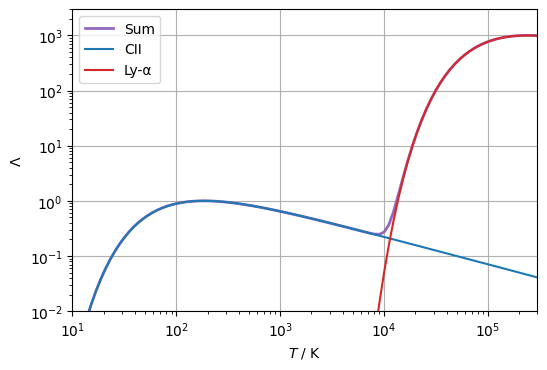

In [9]:
import warnings
warnings.filterwarnings("ignore") # supress np.exp overflow warning 

# constants
Λ0_CII, Λ0_Lyα = 1, 1e3
T0_CII, T0_Lyα = 92, 1.2e5 # [K]

# compute volumentric cooling rates
Ts = np.logspace(1, 5.5, 100)
Λ = lambda Λ0,T0,T: Λ0*(T0/T)**0.5 / np.exp(T0/T) # Cooling function (5.19)
Λ_CII = Λ(Λ0_CII, T0_CII, Ts)
peak = Λ_CII.max() # normalize to CII cooling peak
Λ_CII = Λ_CII/peak
Λ_Lyα = Λ(Λ0_Lyα, T0_Lyα, Ts)/peak
Λ = Λ_CII + Λ_Lyα

fig, ax = plt.subplots(dpi=100)
ax.set(xlabel=r'$T$ / K', ylabel=r'$\Lambda$', xlim=(10,3e5), ylim=(1e-2,3e3))
ax.loglog(Ts, Λ, 'tab:purple', lw=2, label='Sum')
ax.loglog(Ts, Λ_CII, 'tab:blue', label='CII')
ax.loglog(Ts, Λ_Lyα, 'tab:red', label='Ly-α')
ax.legend()
ax.grid()
plt.savefig('Q5.3a.pdf', bbox_inches='tight')

### b

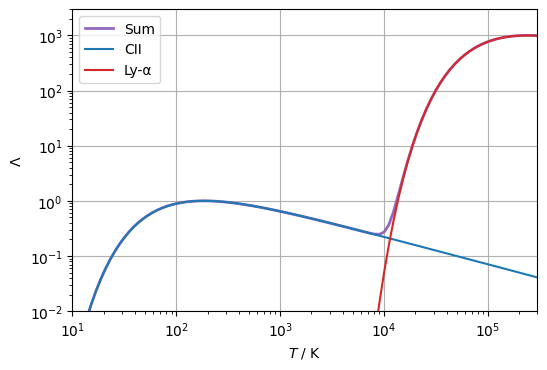

In [7]:
# constants
Λ0_CII, Λ0_Lyα = 1, 1e3
T0_CII, T0_Lyα = 92, 1.2e5 # [K]

# compute volumentric cooling rates
Ts = np.logspace(1, 5.5, 100)
Λ = lambda Λ0,T0,T: Λ0*(T0/T)**0.5 / np.exp(T0/T) # Cooling function (5.19)
Λ_CII = Λ(Λ0_CII, T0_CII, Ts)
peak = Λ_CII.max() # normalize to CII cooling peak
Λ_CII = Λ_CII/peak
Λ_Lyα = Λ(Λ0_Lyα, T0_Lyα, Ts)/peak
Λ = Λ_CII + Λ_Lyα

fig, ax = plt.subplots(dpi=100)
ax.set(xlabel=r'$T$ / K', ylabel=r'$\Lambda$', xlim=(10,3e5), ylim=(1e-2,3e3))
ax.loglog(Ts, Λ, 'tab:purple', lw=2, label='Sum')
ax.loglog(Ts, Λ_CII, 'tab:blue', label='CII')
ax.loglog(Ts, Λ_Lyα, 'tab:red', label='Ly-α')
ax.legend()
ax.grid()
plt.savefig('Q5.3a.pdf', bbox_inches='tight')